In [10]:
"""
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
"""

'\nhttps://pytorch.org/tutorials/beginner/pytorch_with_examples.html\n'

In [2]:
import matplotlib.pyplot as plt

99 1776.8569725748557
199 1253.3597340209628
299 885.151361943471
399 626.0680620727162
499 443.7059143642561
599 315.30408959307124
699 224.86816409465078
799 161.15392276840973
899 116.25348405598811
999 84.60329228877444
1099 62.287757720039636
1199 46.55020284974374
1299 35.449246914481854
1399 27.617275148894684
1499 22.090596519815193
1599 18.18996693965957
1699 15.436512355877028
1799 13.492543042495441
1899 12.119876675101409
1999 11.150481755553463
Result: y = -0.05052298506302897 + 0.8495285137100912 x + 0.008716055629472794 x^2 + -0.09230449799413015 x^3


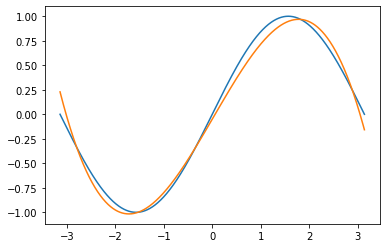

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

def plot_fit():
    plt.plot(x, np.sin(x))
    plt.plot(x, a + b * x + c * x ** 2 + d * x ** 3)
    
plot_fit()

99 1057.86572265625
199 748.7551879882812
299 530.842041015625
399 377.17523193359375
499 268.7896728515625
599 192.32667541503906
699 138.37347412109375
799 100.29661560058594
899 73.41960144042969
999 54.44514465332031
1099 41.04768371582031
1199 31.58666229248047
1299 24.904605865478516
1399 20.184656143188477
1499 16.850278854370117
1599 14.494460105895996
1699 12.829859733581543
1799 11.653532981872559
1899 10.822205543518066
1999 10.23463249206543
Result: y = 0.039567895233631134 + 0.8610981106758118 x + -0.006826120428740978 x^2 + -0.09395016729831696 x^3


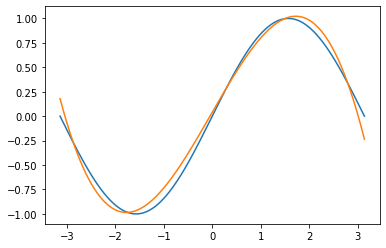

In [9]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plot_fit()

In [12]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 1259.1177978515625
199 837.7756958007812
299 558.5227661132812
399 373.4105529785156
499 250.68365478515625
599 169.3025665283203
699 115.32823181152344
799 79.52378845214844
899 55.767425537109375
999 40.00101089477539
1099 29.535301208496094
1199 22.586227416992188
1299 17.970918655395508
1399 14.904740333557129
1499 12.867110252380371
1599 11.512557983398438
1699 10.611796379089355
1799 10.01256275177002
1899 9.613784790039062
1999 9.348281860351562
Result: y = 0.008623699657619 + 0.8776968717575073 x + -0.001487732632085681 x^2 + -0.09631119668483734 x^3


In [25]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 487.29730224609375
199 327.5572204589844
299 221.24388122558594
399 150.45880126953125
499 103.30882263183594
599 71.88796997070312
699 50.93885803222656
799 36.964561462402344
899 27.638038635253906
999 21.40993881225586
1099 17.248493194580078
1199 14.466240882873535
1299 12.604896545410156
1399 11.358784675598145
1499 10.523965835571289
1599 9.964323997497559
1699 9.588811874389648
1799 9.336690902709961
1899 9.167267799377441
1999 9.053317070007324
Result: y = 0.008908367715775967 + 0.8442420959472656 x + -0.0015368412714451551 x^2 + -0.09155254811048508 x^3


In [26]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 5826.86572265625
199 1354.4080810546875
299 366.595458984375
399 246.46815490722656
499 218.57940673828125
599 185.22503662109375
699 144.96835327148438
799 102.82030487060547
899 65.53424835205078
999 37.66337585449219
1099 20.31625747680664
1199 11.919435501098633
1299 9.241819381713867
1399 8.836339950561523
1499 9.181527137756348
1599 8.858983993530273
1699 8.946148872375488
1799 8.97781753540039
1899 8.897308349609375
1999 8.886634826660156
Result: y = 4.933744524038275e-09 + 0.8571797609329224 x + -3.129980719052128e-09 x^2 + -0.09288923442363739 x^3
